The rows in the dataset represent patients and the columns represent information like body measurements, results from various blood tests, and lifestyle choices. You will use the dataset to explore the relationship between cardiac disease, body measurements, blood markers, and lifestyle choices.

1. Add an overweight column to the data. To determine if a person is overweight, first calculate their BMI by dividing their weight in kilograms by the square of their height in meters. If that value is > 25 then the person is overweight. Use the value 0 for NOT overweight and the value 1 for overweight.
2. Normalize the data by making 0 always good and 1 always bad. If the value of cholesterol or gluc is 1, make the value 0. If the value is more than 1, make the value 1.
3. Convert the data into long format and create a chart that shows the value counts of the categorical features using seaborn's catplot(). The dataset should be split by Cardio so there is one chart for each cardio value.
4. Clean the data. Filter out the following patient segments that represent incorrect data:
diastolic pressure is higher than systolic (Keep the correct data with (df['ap_lo'] <= df['ap_hi']))
height is less than the 2.5th percentile (Keep the correct data with (df['height'] >= df['height'].quantile(0.025)))
height is more than the 97.5th percentile
weight is less than the 2.5th percentile
weight is more than the 97.5th percentile
5. Create a correlation matrix using the dataset. Plot the correlation matrix using seaborn's heatmap(). Mask the upper triangle. 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [ ]:
data = pd.read_csv('/content/medical_examination.csv')
df = pd.DataFrame(data)
df.head()
df.shape

(70000, 13)

In [ ]:
weight = df['weight']
height = df['height']/100
bmi = []
for i in range(len(weight)):
  temp = weight[i]/height[i] ** 2
  if(temp >= 25):
    bmi.append(1)
  else:
    bmi.append(0)
df['overweight'] = bmi
df.head()


,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0


In [ ]:
chol = df['cholesterol']
gluc = df['gluc']
new_chol = []
new_gluc = []
for i, j in zip(chol, gluc):
    if i == 1:
        new_chol.append(0)
    else:
        new_chol.append(1)
    if j == 1:
        new_gluc.append(0)
    else:
        new_gluc.append(1)
df['cholesterol'] = new_chol
df['gluc'] = new_gluc
df


,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


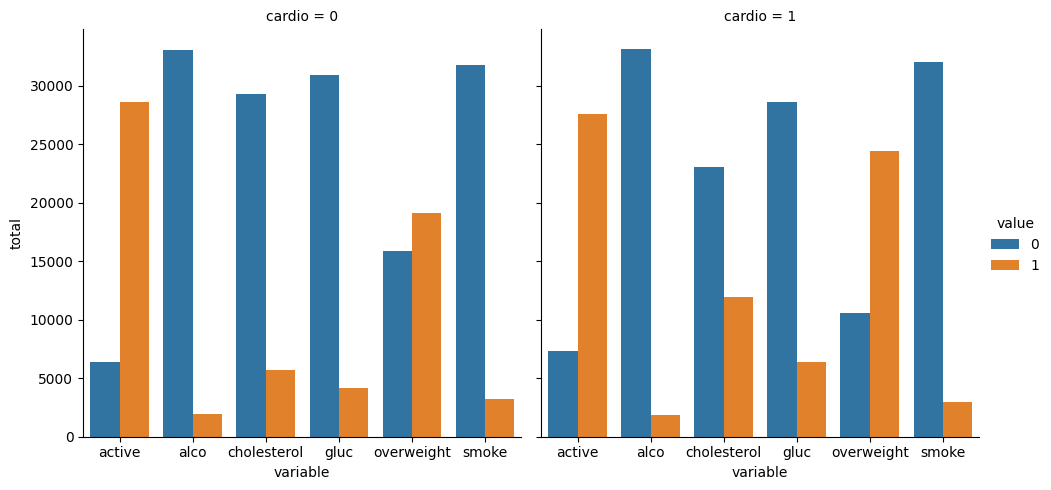

In [ ]:
df_cat = pd.melt(df,id_vars = ['cardio'],value_vars = ['cholesterol','gluc','smoke','alco','active','overweight'])
df_cat['total'] = 1
df_cat = df_cat.groupby(['cardio','variable','value'], as_index = False).count()
fig = sb.catplot(x = "variable", y = "total", data = df_cat, hue = "value", kind = "bar", col = "cardio").fig

<Axes: >

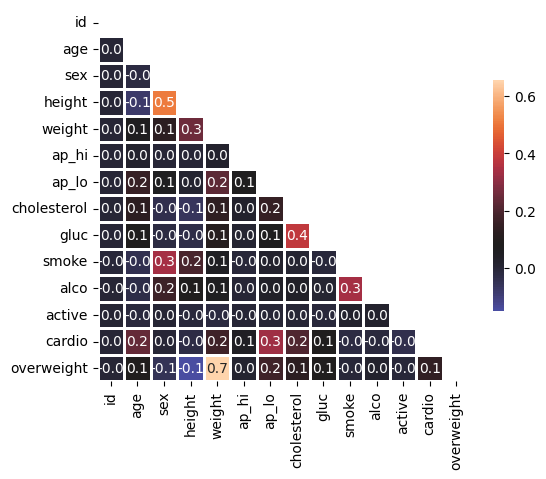

In [ ]:
df_heat = df[
       (df['ap_lo'] <= df['ap_hi']) &
       (df['height'] >= df['height'].quantile(0.025)) &
       (df['height'] <= df['height'].quantile(0.975)) &
       (df['weight'] >= df['weight'].quantile(0.025)) &
       (df['weight'] <= df['weight'].quantile(0.975))]
corr = df_heat.corr(method = "pearson")
mask = np.triu(corr)
fig, ax = plt.subplots(figsize=(6,6))
sb.heatmap(corr, linewidths=1, annot = True, square = True, mask = mask, fmt = ".1f", center=0.08, cbar_kws = {"shrink":0.5})
